Módulo: transformada de Fourier.

Referencia de comparación:

$^1$ *The Scientist and Engineer's Guide to Digital Signal Processing.* Steven W. Smith, Ph.D. 

http://www.dspguide.com/CH11.PDF (capítulo)

http://www.dspguide.com/pdfbook.htm (libro)


La transformada de Fourier es una transformada matemática que realiza el mapeo de funciones que varían en el espacio o en el tiempo, a una representación en el dominio de frecuencias.

Existen 4 formas de transformaciones de Fourier, dependiendo si la señal en el dominio del tiempo (input) o de la frecuencia (output) es continua o discreta.

*   Transformada de Fourier de tiempo continuo y frecuencia continua.
*   Transformada de Fourier de tiempo continuo y frecuencia discreta. Conocida por su transformación inversa: la serie de Fourier.
*   Transformada de Fourier en Tiempo Discreto (DTFT): tiempo discreto, frecuencia continua.
*   Transformada de Fourier Discreta (DFT): tiempo discreto, frecuencia discreta.

En programación, siempre se trabaja con valores discretos. Por ello, la única transformación exacta posible es la DFT (y generalmente realizada por medio del algoritmo Fast Fourier Transform o FFT). En este código, se analiza la DFT.

En la siguiente figura se observan con un ejemplo las 4 formas de transformada de Fourier, cada una en una columna, estando arriba su representación en el tiempo (en azul) y abajo su representación en frecuencia (en rojo).



<a title="Sbyrnes321, CC0, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:From_Continuous_To_Discrete_Fourier_Transform.gif"><img width="2000" alt="From Continuous To Discrete Fourier Transform" src="https://upload.wikimedia.org/wikipedia/commons/e/ea/From_Continuous_To_Discrete_Fourier_Transform.gif"></a>

El siguiente código Python está definido por 3 funciones.

La función **freq_response** genera la representación en los dominios del tiempo y de la frecuencia (tanto en magnitud como en fase) de una señal de entrada.

La función **rc_analysis** se encarga de generar una función coseno realzado, definiendo su roll-off o la extensión de la señal. Si bien el coseno realzado es de extensión infinita, debe estar acotado para poder realizar su análisis computacional.

La función coseno realzado $p(t)$ tiene la siguiente expresión, siendo $\alpha$ el roll-off y $W$ el ancho de banda de la señal: $^2$

$p(t) = \text{sinc} (2\,W\,t) \frac{\text{cos}(2\,\pi\,\alpha\,W\,t)}{1-16\,\alpha^2\,W^2\,t^2} $

La función **superimposed** genera una nueva señal a la salida que resulta de la superposición de 2 señales coseno realzado, a fin de analizar el efecto resultante en su diagrama de magnitud y fase. Para ello, utiliza las funciones ya mencionadas.


$^2$ Equation 4.62. Haykin, Simon. Communication Systems, 4rd Edition. John Wiley & Sons, Inc., New York.

https://ict.iitk.ac.in/wp-content/uploads/EE320A-Principles-Of-Communication-CommunicationSystems-4ed-Haykin.pdf

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings("ignore")

def freq_response(vct_n = np.array([1,0,0,0,0]), vct_t = np.array([0]), sampling_rate = 1, signal_span = 0, \
                  raised_cos = False, second_rc = False, show_fig = [1, 2, 3]):
  
  vct_fft = ( np.fft.fftshift(np.fft.fft(vct_n)/sampling_rate ) )
  vct_fft_x_axis = np.fft.fftshift( np.fft.fftfreq(len(vct_fft), 1/sampling_rate ) ) # frequency vector 
  
  vct_mag = np.abs(vct_fft) # magnitude vector
  vct_phase = np.angle(vct_fft) # phase vector 
  for iter in range(len(vct_mag)):
    if vct_mag[iter] < 0.05:
      vct_phase[iter] = 0 # undetermined case for phase
  
  value_marker = 'b.'
  value_line = 'b'
  value_mface= 'r' 
  
  if second_rc == True:
    vct_mag = np.roll(vct_mag, signal_span - 1 ) 
    vct_phase = np.roll(vct_phase, signal_span - 1 )
    value_marker = 'gx'
    value_line = 'g'
    value_mface= 'r'

    try:
      show_fig.remove(1)
    except:
      pass
      
  if 1 in show_fig:

    plt.figure(1, ([6, 3])); plt.title('Time Domain'); plt.grid(True);
    if raised_cos == True:
      plt.stem(vct_t, vct_n, markerfmt = value_marker, linefmt = value_line, basefmt = value_mface, use_line_collection=True)
    else:
      plt.stem(vct_n, markerfmt = value_marker, linefmt = value_line, basefmt = value_mface, use_line_collection=True)

  if 2 in show_fig and 3 in show_fig:

    plt.figure(2, ([12, 3]));
    plt.subplot(1,2,1); plt.grid(True); plt.title('Freq Domain. Magnitude'); 
    if raised_cos == True: plt.xlim((-1, 1))
    plt.stem(vct_fft_x_axis, vct_mag, markerfmt = value_marker, linefmt = value_line, basefmt = value_mface, use_line_collection=True);

    plt.subplot(1,2,2); plt.grid(True); plt.title('Freq Domain. Phase');
    if raised_cos == True: plt.xlim((-1, 1))
    plt.stem(vct_fft_x_axis, vct_phase, markerfmt = value_marker, linefmt = value_line, basefmt = value_mface, use_line_collection=True);

  elif 2 in show_fig:

    plt.figure(2, ([6, 3])); plt.grid(True); plt.title('Freq Domain. Magnitude'); 
    if raised_cos == True: plt.xlim((-1, 1))
    plt.stem(vct_fft_x_axis, vct_mag, markerfmt = value_marker, linefmt = value_line, basefmt = value_mface, use_line_collection=True);

  elif 3 in show_fig:

    plt.figure(2, ([6, 3])); plt.grid(True); plt.title('Freq Domain. Phase');
    if raised_cos == True: plt.xlim((-1, 1))
    plt.stem(vct_fft_x_axis, vct_phase, markerfmt = value_marker, linefmt = value_line, basefmt = value_mface, use_line_collection=True);

  return [vct_mag, vct_phase, vct_fft_x_axis]

def rc_analysis(delta_t = 0, rolloff = 0, samples_x_sym  = 10, signal_span = 29, second_rc = False, show_fig = [1, 2, 3]):

  BW = 0.5;
  if signal_span % 2 == 0:
    print('Important: Parameter signal_span changed to {}. It must be odd.'.format(signal_span+1))
  t_max = signal_span//2
  vct_t = np.arange(-t_max, t_max+1/samples_x_sym, 1/samples_x_sym) # t_max+1 to consider also last value with its interpolation
  vct_n = np.zeros(len(vct_t)).T
  for it_t in range(len(vct_t)):
    t = vct_t[it_t] + delta_t
    vct_n[it_t] = np.sinc(2*BW*t) * ( np.cos(2*np.pi*rolloff*BW*t) / (1-16*(rolloff**2)*(BW**2)*(t**2)) ) # Time-domain impulse response
  
  [vct_mag, vct_phase, vct_fft_x_axis] = freq_response(vct_n = vct_n, vct_t = vct_t, sampling_rate = samples_x_sym, \
                signal_span = signal_span, raised_cos = True, second_rc = second_rc, show_fig = show_fig)
  
  return [vct_mag, vct_phase, vct_fft_x_axis]

def superimposed(delta_t = 0, rolloff = 0, samples_x_sym = 10, signal_span = 29, show_fig = [1,2,3,4,5]):
  
  [vct_mag_1, vct_phase_1, vct_fft_x_axis_1] = rc_analysis(delta_t, rolloff, samples_x_sym, signal_span, False, show_fig);
  [vct_mag_2, vct_phase_2, vct_fft_x_axis_2] = rc_analysis(delta_t, rolloff, samples_x_sym, signal_span, True, show_fig);

  complex_1 = vct_mag_1*( np.cos(vct_phase_1) + 1j*np.sin(vct_phase_1) )
  complex_2 = vct_mag_2*( np.cos(vct_phase_2) + 1j*np.sin(vct_phase_2) )
  complex_sum = complex_1 + complex_2

  vct_mag = np.abs( complex_sum )
  vct_phase = np.angle( complex_sum )
  vct_fft_x_axis = vct_fft_x_axis_1

  if 4 in show_fig:
    plt.figure(4, ([12, 3]));
    plt.subplot(1,2,1); plt.grid(True); plt.title('Freq Domain. Magnitude');
    plt.xlim((-1, 1))
    plt.stem(vct_fft_x_axis, vct_mag, markerfmt = '.', use_line_collection=True);
    plt.subplot(1,2,2); plt.grid(True); plt.title('Freq Domain. Phase');
    plt.xlim((-1, 1))
    plt.stem(vct_fft_x_axis, vct_phase, markerfmt = '.', use_line_collection=True);

  t_max = signal_span//2; sampling_rate = samples_x_sym;
  vct_t = np.arange(-t_max, t_max+1/samples_x_sym, 1/samples_x_sym) # t_max+1 to consider also last value with its interpolation
  vct_n = np.fft.ifft( np.fft.fftshift((complex_sum)*sampling_rate) )
  
  if 5 in show_fig:
    plt.figure(5, ([6, 3])); plt.title('Time Domain of the sum'); plt.grid(True);   # Impulse response of the sum
    plt.stem(vct_t, vct_n, markerfmt = 'b.', linefmt = 'b', basefmt = 'r', use_line_collection=True)

  return vct_n

Se ejecuta la función **freq_response** definiendo un pulso como vector numérico a cierta tasa de muestreo. La respuesta en frecuencia se observa a frecuencia real.

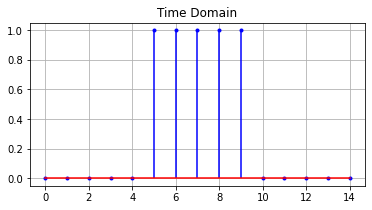

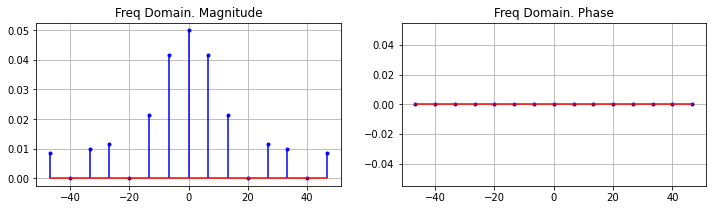

In [ ]:
freq_response( vct_n = np.array([0,0,0,0,0,1,1,1,1,1,0,0,0,0,0]), show_fig = [1, 2, 3], sampling_rate = 100, \
              signal_span = 0, second_rc = False, raised_cos = False, vct_t = np.array([0])); 

Se instancia ahora **freq_response** usando sus parametros con valores por defecto.

La transformada de Fourier de un impulso tiene un espectro continuo (verifica diagrama de magnitud). Como el impulso no está desplazado en el tiempo, su fase es cero (verifica diagrama de fase).

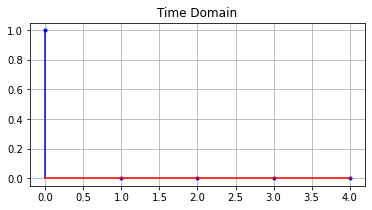

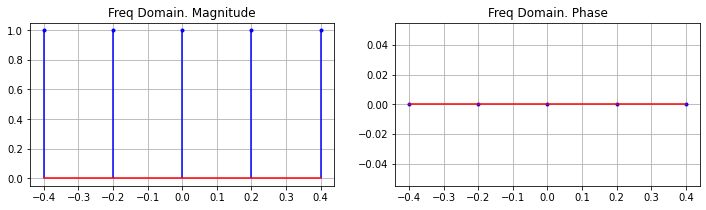

In [ ]:
# Function test with default parameters 
freq_response();

Se parametriza la función con un impulso de entrada con mayor resolución. 

Comparar con Fig. 11.1 del libro de la Referencia.

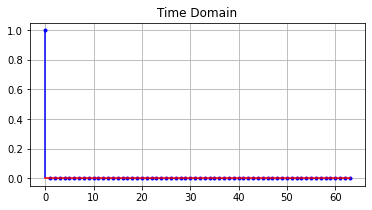

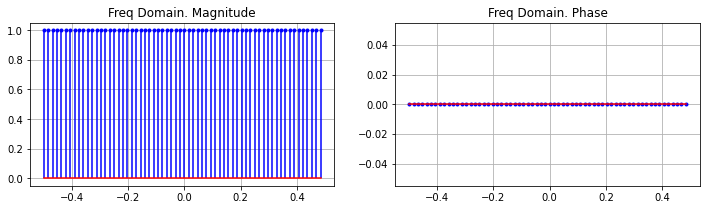

In [ ]:
# Fig. 11.1. Delta Function.
vct_n = np.zeros(64); vct_n[0] = 1
freq_response(vct_n);

Se aplica un desplazamiento temporal al impulso temporal. En frecuencia, solo la fase de la señal resulta modificada. 
Comparar con Fig. 11.1 del libro de la Referencia.

**Ejercicio**: seguir cambiando la posición del impulso y observar cómo va variando la fase. 

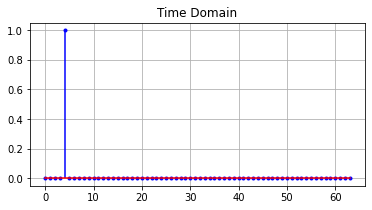

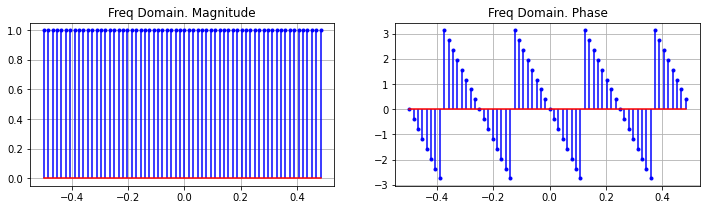

In [ ]:
# Fig. 11.1. Delta Function.
vct_n = np.zeros(64); vct_n[4] = 1
freq_response(vct_n);

El equivalente en frecuencia al pulso rectangular temporal, es una función sinc, como se observa su representación en valores absolutos en el diagrama de magnitud. La fase varía entre 0 y PI.

Comparar con Fig. 11.3 del libro de la Referencia.

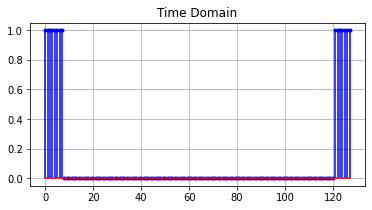

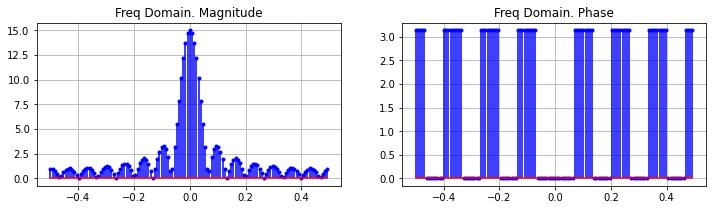

In [ ]:
# Fig. 11.3. Rectangular Pulse.
vct_n = np.ones(128); vct_n[8:-7] = 0 # number of points in '1', determines the amplitude max value (i.e., 15)
freq_response(vct_n);

El desplazamiento temporal del pulso genera un cambio solo en el diagrama de fase, al igual que en el caso del impulso.

**Ejercicio**: a partir de la definición de transformada de Fourier, y considerando las propiedades de la función exponencial compleja, demostrar por qué el desplazamiento temporal genera solo un cambio de fase, quedando la magnitud sin modificar.

$X(j \omega) = |X(j \omega)| e^{j \omega} \\ 
X(j \omega) = F(x(t)) = \int x(t) e^{-j \omega t} dt $ \\
$F(x(t - \delta t)) = $ 


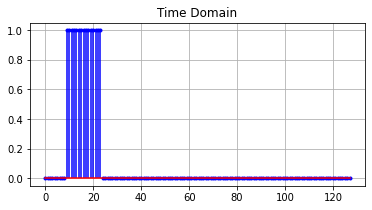

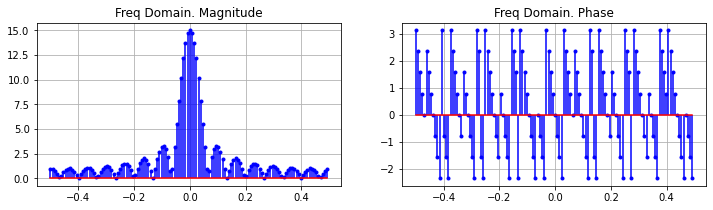

In [ ]:
# Fig. 11.3. Rectangular Pulse. 
vct_n = np.zeros(128); vct_n[9:24] = 1
freq_response(vct_n);

De forma contraria al caso anterior, la tranformada de Fourier de la función sinc es el pulso rectangular.

Comparar con Fig. 11.5 del libro de la Referencia.

La hoy indiscutida validez de la transformada de Fourier fue puesta en jaque desde sus comienzos por Lagrange, no admitiendo (con justa argumentación) que la suma periódica de ondas senoidales pueda representar una señal con esquinas, como el caso de una onda rectangular.

**Ejercicio**: explicar por qué fenómeno se produce una variación de magnitud en los extremos del pulso, y por qué este problema puede ser eliminado al utilizar la DFT.

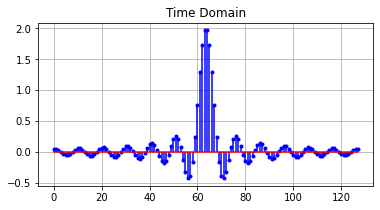

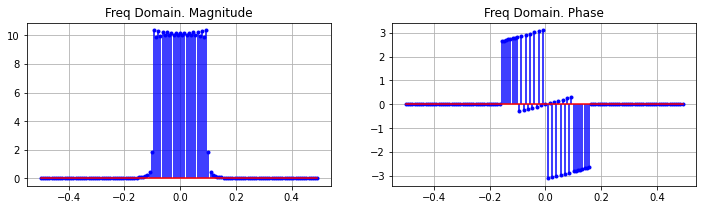

In [ ]:
# Fig. 11.5. Sinc wave.
vct_n = 2*np.sinc(np.linspace(-2*2*np.pi, 2*2*np.pi, num=128))
freq_response(vct_n);

La onda senoidal equivale a dos impulsos en la respuesta en frecuencia. 

Comparar con Fig. 11.7 del libro de la Referencia. Observar que en la misma solo se consideran frecuencias positivas.


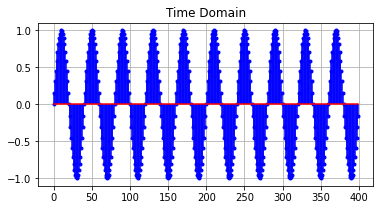

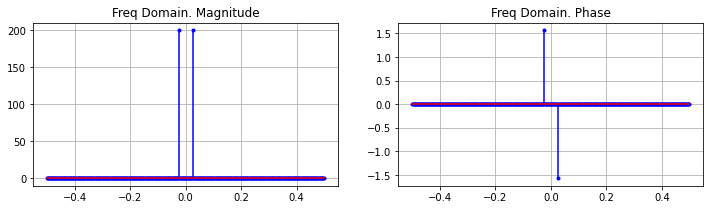

In [ ]:
# Fig. 11.7. Sine wave.
vct_n = np.sin(np.arange(0, 10, 0.025)*2*np.pi) 
freq_response(vct_n);

Se genera una nueva onda senoidal 

**Ejercicio:** ¿qué determina la posición en frecuencia del impulso?. 


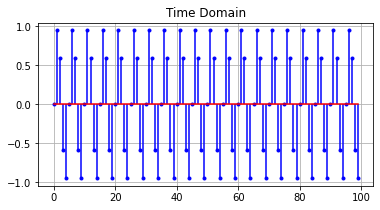

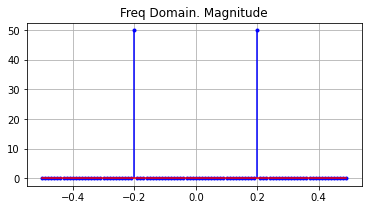

In [ ]:
vct_n = np.sin(np.arange(0, 20, 0.20)*2*np.pi) 
freq_response(vct_n, show_fig = [1, 2]);

Se vuelve a simular el espectro de frecuencia de la función senoidal. El paso de muestreo es apenas un poco mayor, pero ahora en el diagrama de magnitud, aparece un nuevo efecto de análisis: el leakage o manchado espectral.

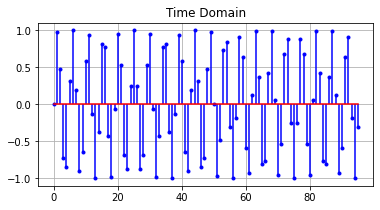

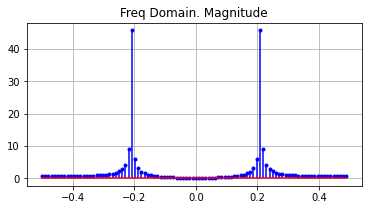

In [ ]:
vct_n = np.sin(np.arange(0, 20, 0.21)*2*np.pi) 
freq_response(vct_n, show_fig = [1, 2]);

Hay dos posibles causas de leakage: 

*   Acotamiento de una señal infinita (como el seno) a una finita, lo que siempre sucede en el procesamiento digital de señales.
*   La ventana de acotamiento no posee un número entero de ciclos.

Cuando la transformada de Fourier es empleada usando la DTFT, se pueden evidenciar las 2 fuentes de leakage. Sin embargo, trabajando con la DFT, una de las dos causas puede ser ocultada (creando ilusión de que no hay leakage) por el mismo muestreo, como se puede observar en la siguiente figura.

**Ejercicio**: ¿Cuál de las dos causas de leakage es evidenciada en la simulación anterior?


<a title="Bob K, CC0, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Spectral_leakage_caused_by_%22windowing%22.svg"><img width="1024" alt="Spectral leakage caused by &quot;windowing&quot;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fb/Spectral_leakage_caused_by_%22windowing%22.svg/1024px-Spectral_leakage_caused_by_%22windowing%22.svg.png"></a>

**Comprobación por simulación de Leakage**

Caso sin acotar. 

Se observa que los impulsos tienen mayor amplitud (tienden a infinito) a medida que la señal se vuelve cada vez más extensa.

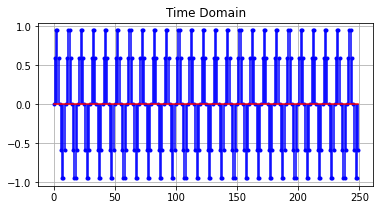

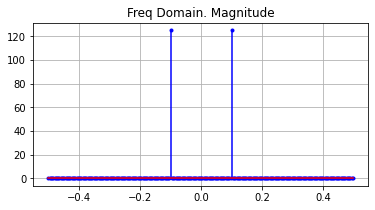

In [ ]:
vct_n = np.sin(np.arange(0, 50, 0.2)*np.pi) 
freq_response(vct_n, show_fig = [1, 2]);

Señal acotada en un número entero de ciclos.

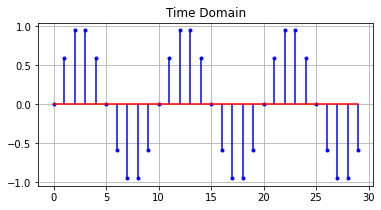

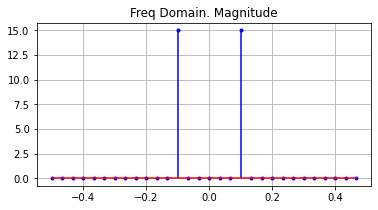

In [ ]:
vct_n = np.sin(np.arange(0, 6, 1/5)*np.pi) 
freq_response(vct_n, show_fig = [1, 2]);

Señal acotada en un número no entero de ciclos. 

El leakage entonces puede ser generado por un valor inadecuado en el paso (como en la simulación anteriormente vista, tercer argumento de np.arange) o en la extensión de la señal (primer o segundo argumento de np.arange, como en la presente simulación).

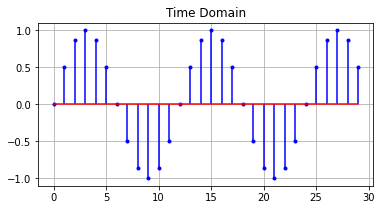

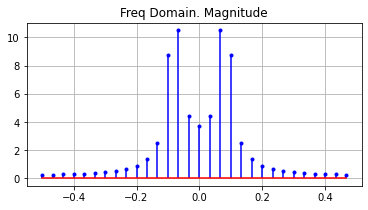

In [ ]:
vct_n = np.sin(np.arange(0, 5, 1/6)*np.pi) 
freq_response(vct_n, show_fig = [1, 2]);

La diferencia relativa en magnitud de leakage es mayor en esta nueva simulación que en la anterior. Para notar esto, comparar en ambos gráficos el valor máximo del impulso con el valor de magnitud en la posición cero. Esto sucede porque el ancho de los lóbulos de la función sinc son cada vez más angostos mientras más ancho es el pulso cuadrado, o dicho en otras palabras, el paso de muestreo es inversamente proporcional al ancho de la ventana de acotamiento. 

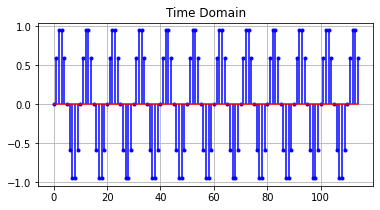

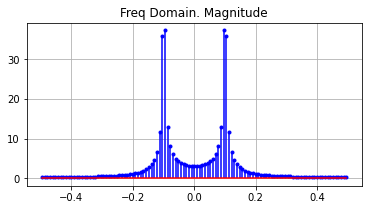

In [ ]:
vct_n = np.sin(np.arange(0, 23, 0.2)*np.pi)
freq_response(vct_n, show_fig = [1, 2]);

Se visualiza ahora la transformación de la función coseno.

**Ejercicio**: probar con otras funciones ofrecidas por Numpy.

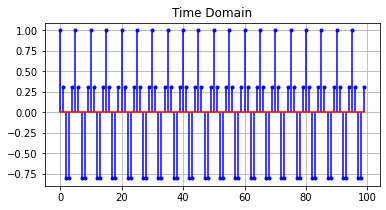

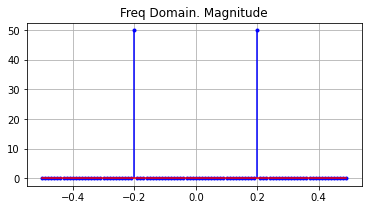

In [ ]:
# Cosine wave. Phase is not shown, using optional parameter show_fig. NO LEAKAGE
vct_n = np.cos(np.arange(0, 20, 0.2)*2*np.pi)
freq_response(vct_n, show_fig = [1, 2]);

**Análisis de la función Coseno Realzado**

Se utiliza ahora la función **rc_analysis** para simular la respuesta en frecuencia de una señal coseno realzada.

Un filtro coseno realzado es uno capaz de reducir al mínimo la interferencia intersímbolos (ISI). Se llama así porque la parte no nula del espectro frecuencial es un coseno que se encuentra por encima del eje horizontal.

Una de las características de este filtro está definida por su parámetro de caída o roll-off. En este caso, se simula para un roll-off cero, lo que vuelve al coseno realzado equivalente a una función sinc.

**Ejercicio**: Demostrar matemáticamente por qué el coseno realzado en tiempo x = 0 vale 1.

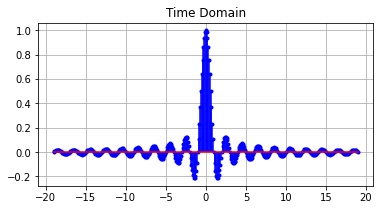

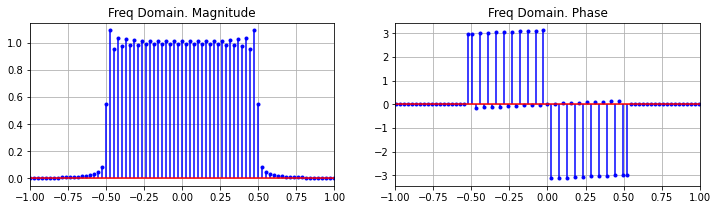

In [ ]:
# Raised Cosine wave, with roll-off 0
rc_analysis(delta_t = 0, rolloff = 0, samples_x_sym  = 10, signal_span = 39);

Se simula el coseno realzado con un roll-off de 0.5. Se observa que esto genera una caída más suave en el espectro de frecuencia, ensanchándose tanto en magnitud como en fase. Esto trae como consecuencia la posibilidad de producirse el efecto de aliasing o enmascaramiento del espectro plegado.

**Ejercicio**: definir qué es el aliasing, y explicar el problema que ocasiona en un detector de símbolos. 


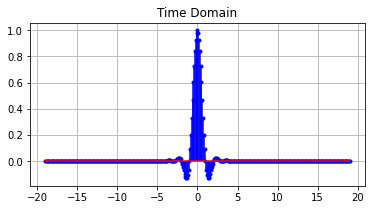

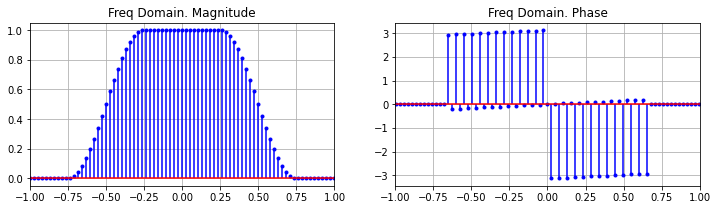

In [ ]:
# Raised Cosine wave, with roll-off 0.5
rc_analysis(delta_t = 0, rolloff = 0.5, samples_x_sym  = 10, signal_span = 39);

**Superposición de espectros**

Una señal analógica posee un espectro de frecuencias continuo. El muestreo de una señal, obtenido al multiplicar la señal con un tren de impulsos, produce un nuevo espectro de frecuencias. En cada múltiplo par de la frecuencia de muestreo existe una copia idéntica del espectro (banda lateral superior), y en cada múltiplo impar, una copia con simetría par (banda lateral inferior).

Una señal digital no puede contener frecuencias mayores a la mitad de la frecuencia de muestreo, es decir, mayores a la tasa de Nyquist. La frecuencia de los datos muestreados coincide con la frecuencia de una señal continua cuando esta se encuentra por debajo de la tasa de Nyquist. Cuando la frecuencia de la señal continua supera esta tasa, el efecto de aliasing cambia la frecuencia de los datos muestreados.

La señal coseno realzado posee la particularidad de que, si se la muestrea sin delay, la magnitud del espectro resultante de la superposición del espectro original y de sus copias es constante (roll-off entre 0 y 1).


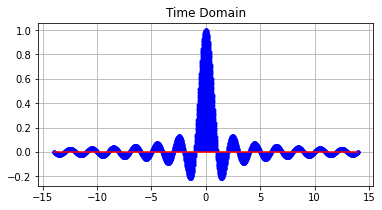

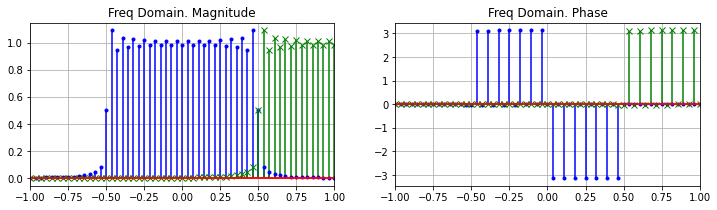

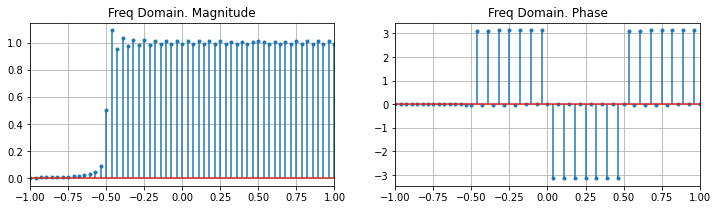

In [ ]:
superimposed(delta_t = 0, rolloff = 0, samples_x_sym = 64, signal_span = 29)

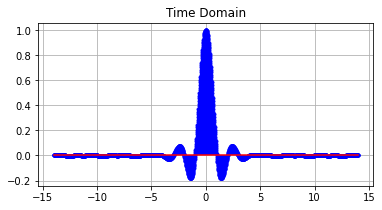

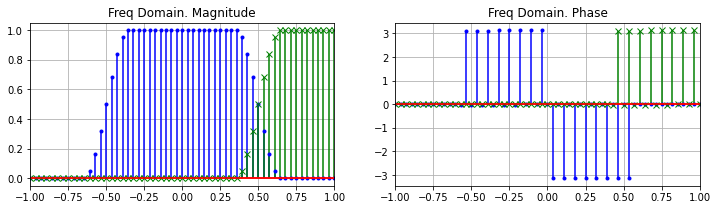

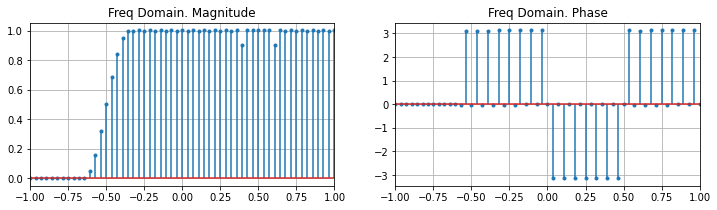

In [ ]:
superimposed(delta_t = 0, rolloff = 0.3, samples_x_sym = 64, signal_span = 29)

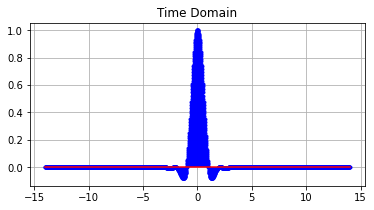

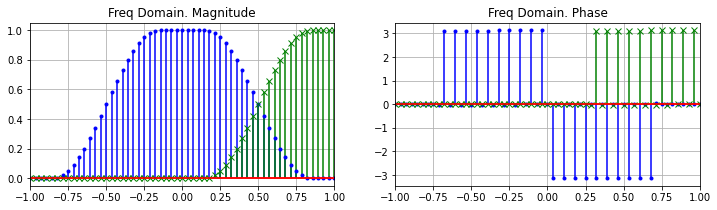

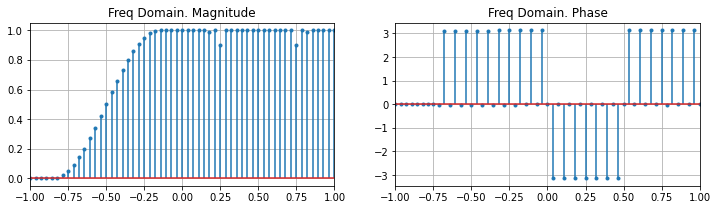

In [ ]:
superimposed(delta_t = 0, rolloff = 0.7, samples_x_sym = 64, signal_span = 29)

Si la señal coseno realzado posee cierto retardo, la magnitud del espectro superpuesto ya no conserva la propiedad descripta. En este caso, se observa un notch en la magnitud del espectro al valor dado de delay.

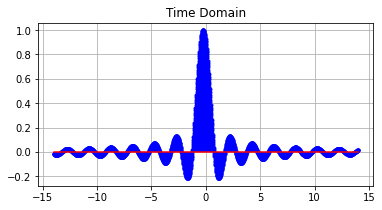

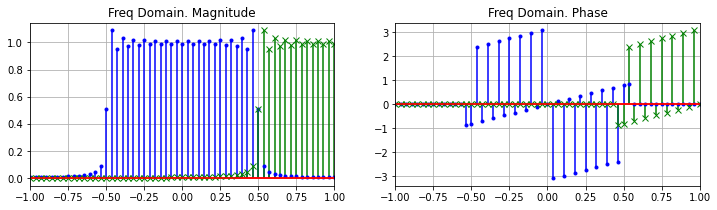

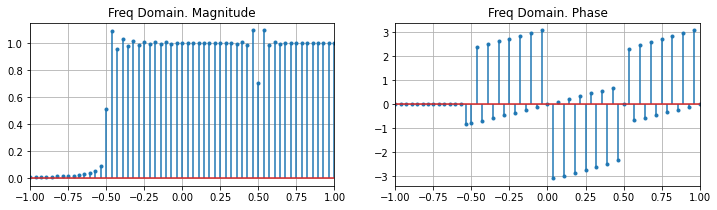

In [ ]:
superimposed(delta_t = 0.25, rolloff = 0, samples_x_sym = 64, signal_span = 29)

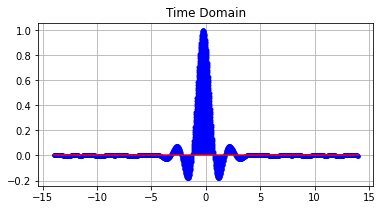

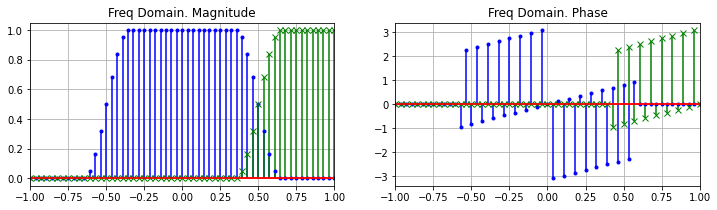

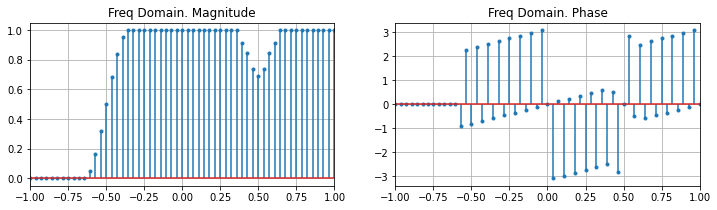

In [ ]:
superimposed(delta_t = 0.25, rolloff = 0.3, samples_x_sym = 64, signal_span = 29)

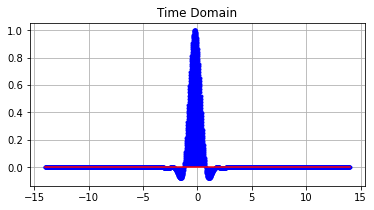

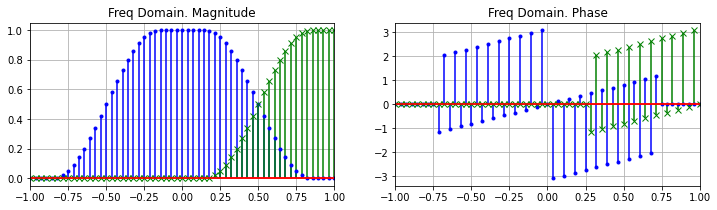

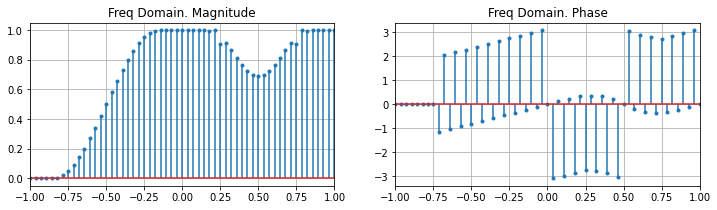

In [ ]:
superimposed(delta_t = 0.25, rolloff = 0.7, samples_x_sym = 64, signal_span = 29)

A este valor de delay, la magnitud del espectro superpuesto posee un notch más pronunciado, prácticamente llegando a cero. 

**Ejercicio**: realizar análisis fasorial de los dos espectros que se superponen en este caso (el original y su copia), observando por qué se produce un cero a ese valor de frecuencia (0.5). 

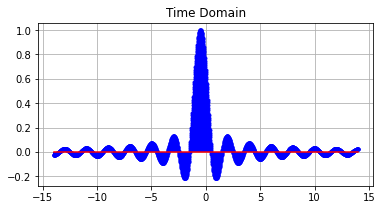

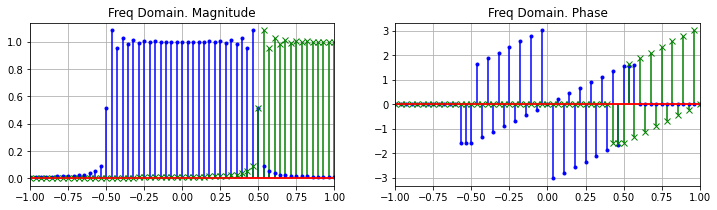

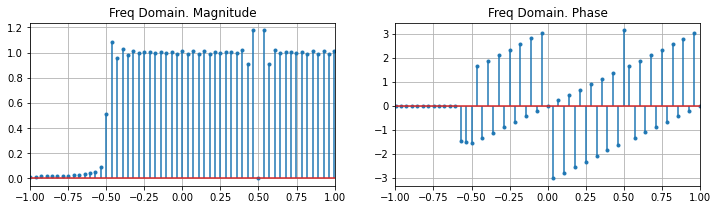

In [ ]:
superimposed(delta_t = 0.5, rolloff = 0, samples_x_sym = 64, signal_span = 29)

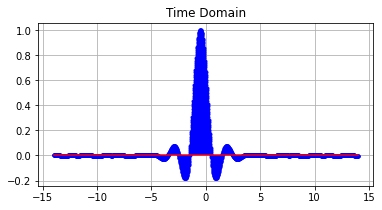

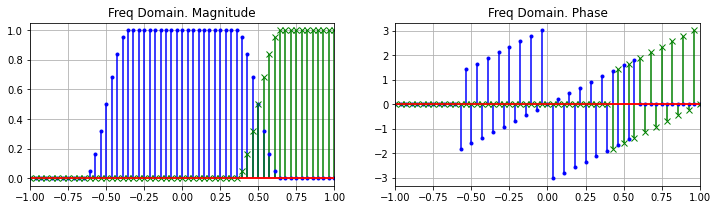

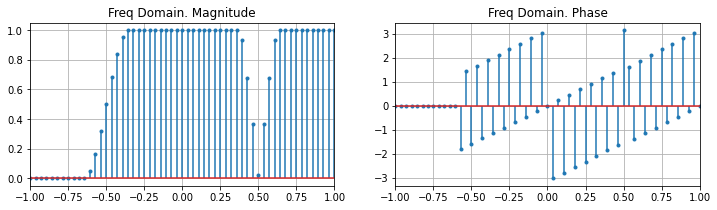

In [ ]:
superimposed(delta_t = 0.5, rolloff = 0.3, samples_x_sym = 64, signal_span = 29)

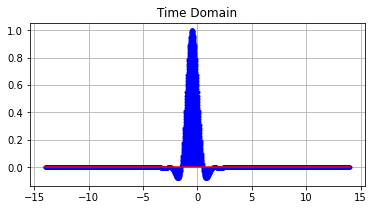

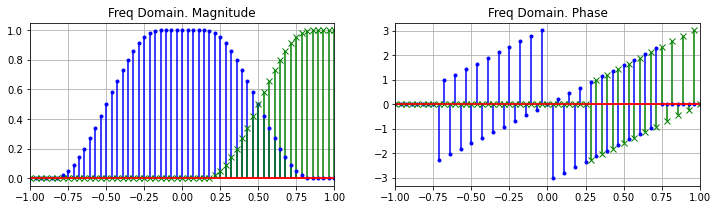

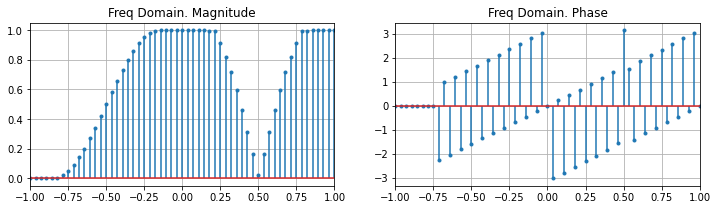

In [ ]:
superimposed(delta_t = 0.5, rolloff = 0.7, samples_x_sym = 64, signal_span = 29)

**Cambio de retardo y de número de muestras por símbolo de la señal coseno realzado:**

A continuación, se observan los gráficos correspondientes a la señal coseno realzado al cambiar el valor de retardo y de número de muestras por símbolo. Observar que en el primer caso, sin retardo y a 1 muestra por símbolo, la señal muestreada es idéntica a una señal impulsiva.

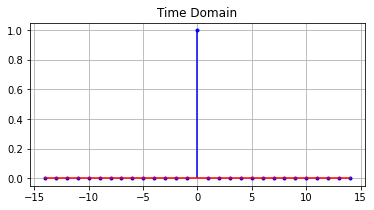

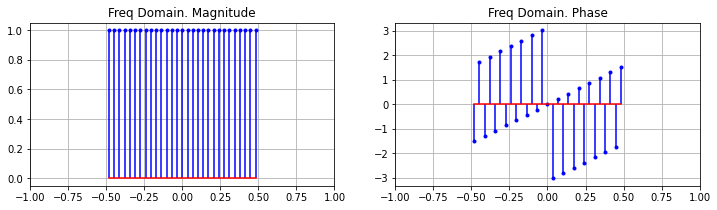

In [ ]:
rc_analysis(delta_t = 0, samples_x_sym  = 1);

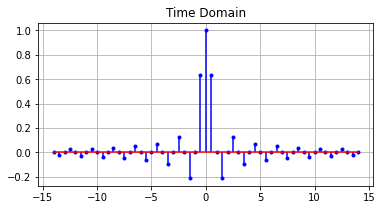

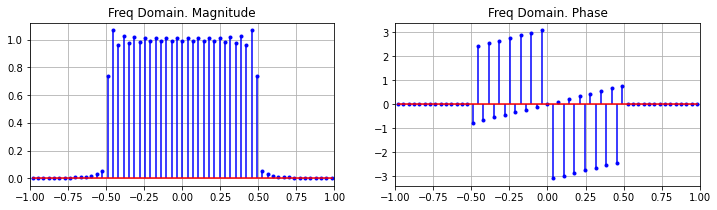

In [ ]:
rc_analysis(delta_t = 0, samples_x_sym  = 2);

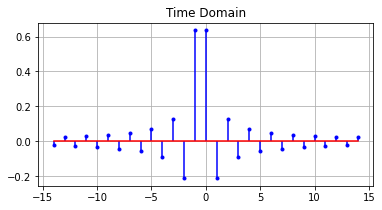

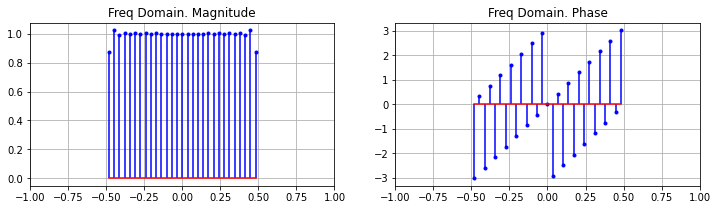

In [ ]:
rc_analysis(delta_t = 0.5, samples_x_sym  = 1);

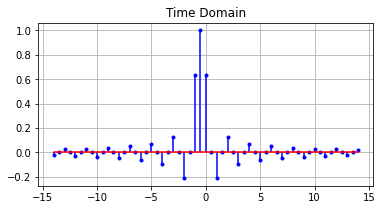

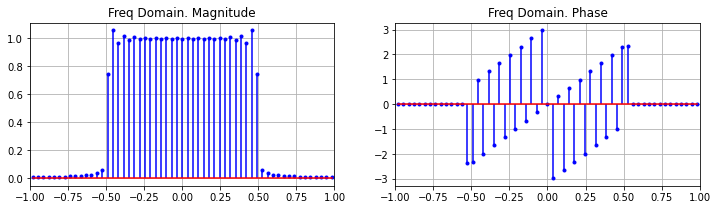

In [ ]:
rc_analysis(delta_t = 0.5, samples_x_sym  = 2);

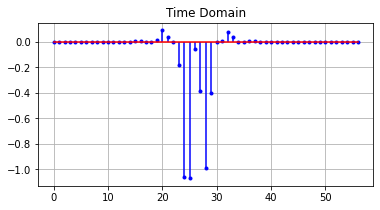

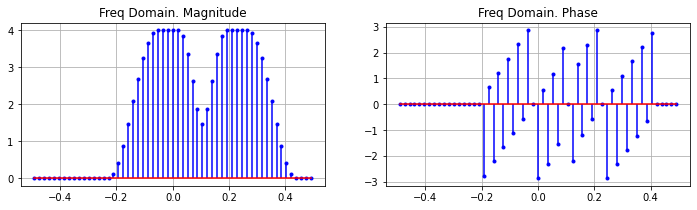

In [ ]:
vct_n = superimposed(delta_t = 0.5, rolloff = 0.7, samples_x_sym = 4, signal_span = 15, show_fig = []);
freq_response(vct_n, show_fig = [1, 2, 3]);

[![CC BY 4.0][cc-by-shield]][cc-by]

This work is licensed under a
[Creative Commons Attribution 4.0 International License][cc-by].

[![CC BY 4.0][cc-by-image]][cc-by]

[cc-by]: http://creativecommons.org/licenses/by/4.0/
[cc-by-image]: https://i.creativecommons.org/l/by/4.0/88x31.png
[cc-by-shield]: https://img.shields.io/badge/License-CC%20BY%204.0-lightgrey.svg

![logo_neon_erasmus](https://raw.githubusercontent.com/neon-iot/communication_labs/main/detection_theory/notebooks/images/BannerSupportErasmus_.png)
